# CIFAR-10

In [768]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [769]:
seed = 42
_ = torch.manual_seed(seed=seed)

In [770]:
# loading cifar10 dataset
transform = transforms.Compose([transforms.ToTensor()])
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar10 = torchvision.datasets.CIFAR10(root='cifar10/', transform=transform, train=True)
cifar10_loader = DataLoader(cifar10, batch_size=1)

In [771]:
# viewing classes
labels = cifar10.classes
class_to_ids = cifar10.class_to_idx
print(f'{labels}')
print(f'{class_to_ids}')

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


## Viewing some random images

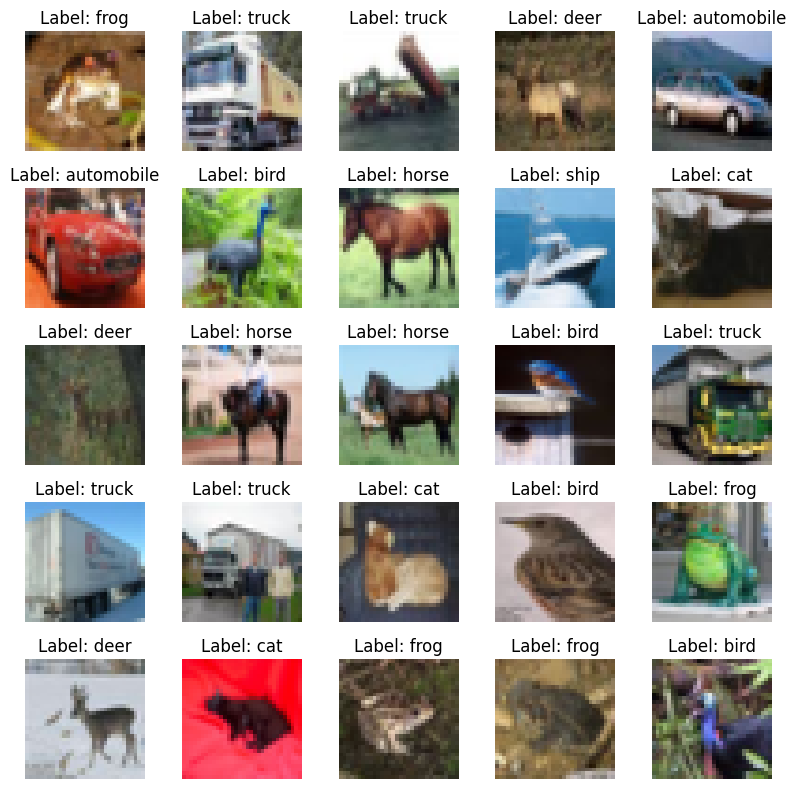

In [772]:
N = 5               # N^2 images
fig, ax = plt.subplots(nrows=N, ncols=N,figsize=(8,8))

ax = ax.flatten()   # make indexing easier
for i, (image, label) in enumerate(cifar10_loader):
    if i == N*N: break
    image = image.squeeze().permute(1, 2, 0).numpy() # [1, 3, 32, 32] -> [3, 32, 32] -> [32, 32, 3]
    label = labels[label.numpy().item()]

    ax[i].imshow(image)
    ax[i].set_title(f'Label: {label}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

## ZCA Whitening

In [773]:
X_train = cifar10.data[:64, :, :, :]
X_train2 = cifar10.data[:64, :, :, :]
print(X_train.shape)

(64, 32, 32, 3)


In [774]:
X_train = X_train.reshape(-1, 3 * 32 * 32)
print(X_train.shape)

(64, 3072)


In [775]:
X = X_train[7]
print(X.shape)

(3072,)


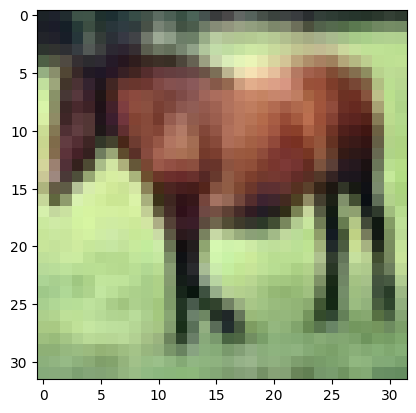

In [776]:
plt.imshow(X_train[7].reshape(32, 32, 3))   # horse
plt.show()

In [777]:
print(X.mean(axis=0))

121.69856770833333


In [778]:
covariance_matrix = np.cov(X_train, rowvar=True)

In [779]:
print(covariance_matrix.shape)

(64, 64)


In [780]:
U, S, V = np.linalg.svd(covariance_matrix)

In [781]:
print(U.shape)
print(S.shape)
print(V.shape)

(64, 64)
(64,)
(64, 64)


In [782]:
epsilon = 0.1
X_train_zca = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [783]:
print(X_train_zca.shape)

(64, 64)


In [784]:
X = X_train - X_train.mean()
X = X / np.std(X, axis=0)

In [785]:
X_train_zca = np.dot(X_train_zca, X)
print(X_train_zca.shape)

(64, 3072)


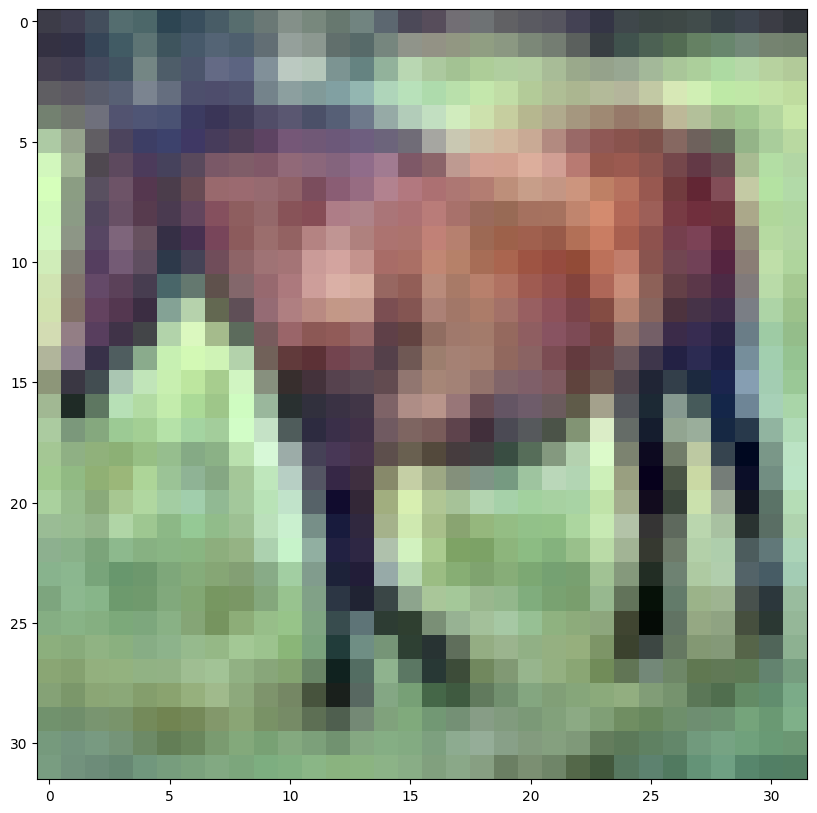

In [786]:
def show(i):
    i = i.reshape((32, 32, 3))
    m, M = i.min(), i.max()
   
    plt.figure(figsize = (10, 10))
    plt.imshow((i - m) / (M - m))
    plt.show()

show(X_train_zca[7])

In [787]:
def zca_whitening(
        X: torch.Tensor,
        epsilon: float=0.1
        ) -> torch.Tensor:
    X = X.reshape(-1, 3 * 32 * 32)  # [N, 3, 32, 32] -> [N, 3072]

    X = X - X.mean(axis=0)

    cov = np.cov(X, rowvar=False)

    U, S, V = np.linalg.svd(cov)

    X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X.T).T
    X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min()) 
    return X_ZCA_rescaled

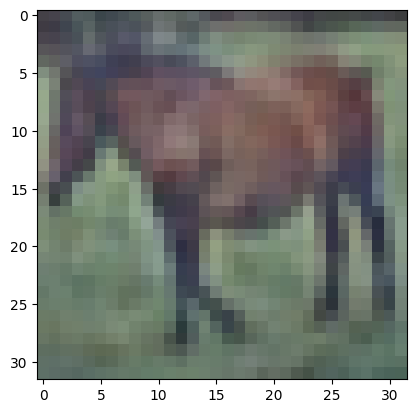

In [788]:
X_train2 = zca_whitening(X_train2)

plt.imshow(X_train2[7].reshape(32, 32, 3))


In [789]:
print(X_train2.shape)
X_train2 = X_train2.reshape(64, 32, 32, 3)
print(X_train2.shape)

(64, 3072)
(64, 32, 32, 3)


In [790]:
from torch.utils.data import TensorDataset, DataLoader


X_train, y_train = torch.load('cifar10_train_zca.pt', weights_only=False)

In [791]:
print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
(50000, 3, 32, 32)
torch.Size([50000])


In [792]:
X_train = torch.from_numpy(X_train).float()  # (N, C, H, W)
dataset = TensorDataset(X_train, y_train)

In [793]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])


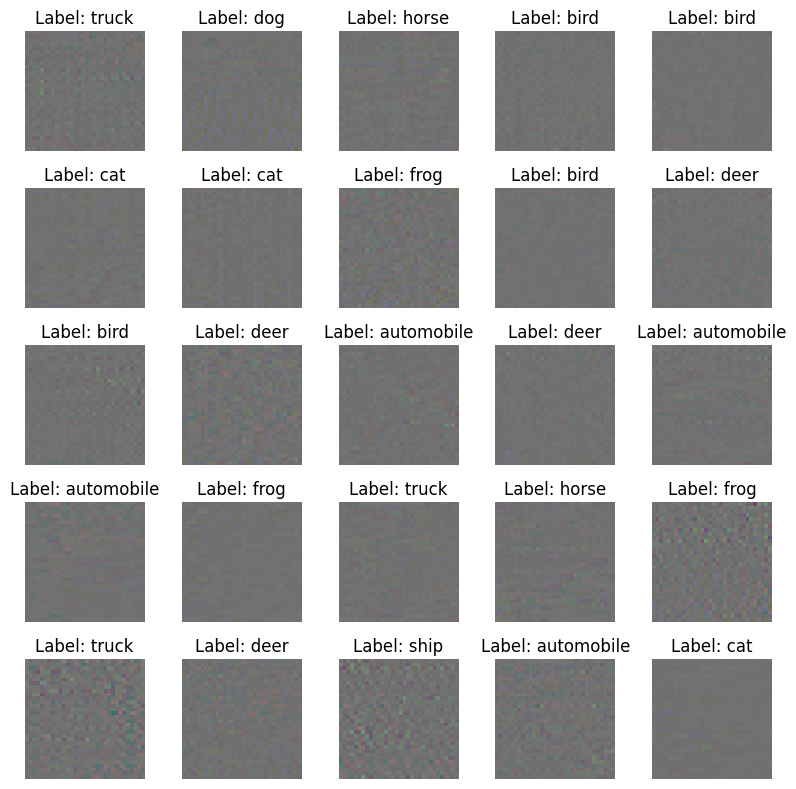

In [ ]:
N = 5               # N^2 images
fig, ax = plt.subplots(nrows=N, ncols=N,figsize=(8,8))

ax = ax.flatten()   # make indexing easier
for i, (image, label) in enumerate(dataloader):
    if i == N*N: break
    image = image.squeeze().permute(1, 2, 0).numpy() # [1, 3, 32, 32] -> [3, 32, 32] -> [32, 32, 3]
    label = labels[label.numpy().item()]

    ax[i].imshow(image)
    ax[i].set_title(f'Label: {label}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()